(array([15949., 15953., 15957., 15961., 15965., 15969., 15973., 15977.,
        15979.]),
 [Text(15949.0, 0, '2013-09-01'),
  Text(15953.0, 0, '2013-09-05'),
  Text(15957.0, 0, '2013-09-09'),
  Text(15961.0, 0, '2013-09-13'),
  Text(15965.0, 0, '2013-09-17'),
  Text(15969.0, 0, '2013-09-21'),
  Text(15973.0, 0, '2013-09-25'),
  Text(15977.0, 0, '2013-09-29'),
  Text(15979.0, 0, '2013-10-01')])

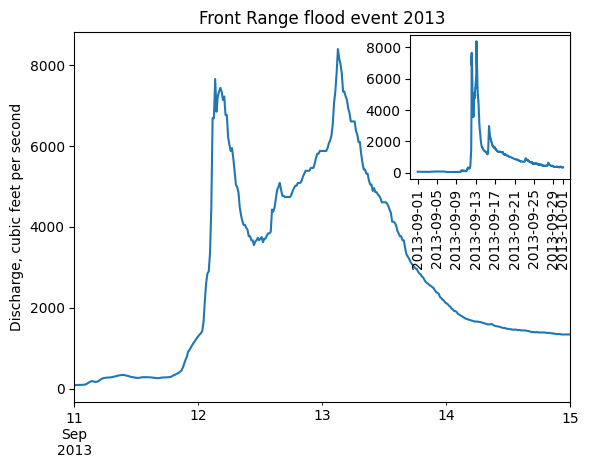

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

discharge = pd.read_csv("data/bouldercreek_09_2013.txt",
                        skiprows=27, delimiter="\t",
                        names=["agency", "site_id", "datetime",
                               "timezone", "flow_rate", "discharge_cd"])
discharge["datetime"] = pd.to_datetime(discharge["datetime"])
flood = discharge[(discharge["datetime"] >= "2013-09-11") &
                  (discharge["datetime"] <= "2013-09-15")]

fig, ax = plt.subplots()

flood.plot(x="datetime", y="flow_rate", ax=ax)
ax.set_xlabel("")  # no label
ax.set_ylabel("Discharge, cubic feet per second")
ax.legend().set_visible(False)
ax.set_title("Front Range flood event 2013")

ax2 = fig.add_axes([0.65, 0.575, 0.25, 0.3])
# DataFrame.plot raises an error with an inset axis object,
# so we use matplotlib's plot method instead
ax2.plot("datetime", "flow_rate", data=discharge)
plt.xticks(rotation=90)